# Lab 6: Searching

Lecturer: <code>Sirasit Lochanachit</code>

Course:

<code>01526121 Data Structures and Algorithms [SIIE]
</code>

Term: <code>02/2024</code>

---

## 0. Gentle reminder of Big-O of data structures' operations

Array or list:
- Searching (indexing): __*O(1)*__
- Appending: __*O(1)*__
- Linear Search (unsorted data): __*O(N)*__
- Binary Search (sorted data): __*O(log N)*__
- Insertion/Deletion: __*O(N)*__

Linked List:
- Searching: __*O(N)*__
- Appending: __*O(1)*__
- Insertion/Deletion: __*O(1)*__

---

## Lab 6-1: Implement Linear/Sequential Search and Binary Search

# 1. Linear/Sequential Search

## Lab 6-1: Implement Linear/Sequential Search

### Problem Description

Your task is to implement a function `linear_search(data, target)` that that takes a list `data` and a target value `target` as input.

The function should perform a linear search to find the index of the `target` within the `data`.

### Requirement

- If the target is found, print an __index__ and return its `index`
- If the target is not found, print `'Target not Found'` and return `False`

In [6]:
def linear_search(data, target):
    for i in range(len(data)):
        if data[i] == target:
            print(i)
            return i
    print("Target not Found")
    return False


### Testing Codes

In [7]:
data = [10,20,40,50]
linear_search(data,40)

2


2

In [8]:
linear_search(data,100)

Target not Found


False

### Structured Test Case

Run the following code and see the result:
- If all tests pass, you'll see 'All test cases passed' (which is good!).
- If a test fails, you'll see an AssertionError indicating which test case failed and why.

In [9]:
def test_linear_search():
  test_cases = [
      {'input': {'arr': [4, 2, 7, 1, 9], 'target': 7}, 'expected': 2},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 1}, 'expected': 0},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 5}, 'expected': 4},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 6}, 'expected': False},
      {'input': {'arr': [], 'target': 5}, 'expected': False},
      {'input': {'arr': [5], 'target': 5}, 'expected': 0},
      {'input': {'arr': [5], 'target': 6}, 'expected': False}
  ]

  for case in test_cases:
    arr = case['input']['arr']
    target = case['input']['target']
    expected = case['expected']
    result = linear_search(arr, target)
    assert result == expected, f"For input {arr}, target {target}: expected {expected}, but got {result}"
  print("\n#############################################")
  print("All test cases passed!")
  print("#############################################")

# Run the tests:
if __name__ == "__main__":
  test_linear_search()

2
0
4
Target not Found
Target not Found
0
Target not Found

#############################################
All test cases passed!
#############################################


# 2. Binary Search

## Lab 6-2: Implement Binary Search

### Problem Description

Your task is to implement a function `binary_search_iterative(data, target)` that that takes a sorted list `data` and a target value `target` as input.

The function should perform a binary search to find the index of the `target` within the `data`.

### Requirement

- If the target is found, print an __index__ and return its `index`
- If the target is not found, print `'Target not Found'` and return `False`

In [10]:
# Non-recursive version
def binary_search_iterative(data, target):
    left = 0
    right = len(data) - 1

    while left <= right:
        mid = (left + right) // 2

        if data[mid] == target:
            print(mid)
            return mid
        elif data[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    print("Target not Found")
    return False


### Testing Codes

In [11]:
binary_search_iterative(data,40)

2


2

In [12]:
binary_search_iterative(data,100)

Target not Found


False

### Structured Test Case

Run the following code and see the result:
- If all tests pass, you'll see 'All test cases passed' (which is good!).
- If a test fails, you'll see an AssertionError indicating which test case failed and why.

In [13]:
def test_binary_search():
  test_cases = [
      {'input': {'arr': [2, 4, 7, 10, 13], 'target': 7}, 'expected': 2},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 1}, 'expected': 0},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 5}, 'expected': 4},
      {'input': {'arr': [1, 2, 3, 4, 5], 'target': 6}, 'expected': False},
      {'input': {'arr': [], 'target': 5}, 'expected': False},
      {'input': {'arr': [5], 'target': 5}, 'expected': 0},
      {'input': {'arr': [5], 'target': 6}, 'expected': False}
  ]

  for case in test_cases:
    arr = case['input']['arr']
    target = case['input']['target']
    expected = case['expected']
    result = binary_search_iterative(arr, target)
    assert result == expected, f"For input {arr}, target {target}: expected {expected}, but got {result}"
  print("\n#############################################")
  print("All test cases passed!")
  print("#############################################")

# Run the tests:
if __name__ == "__main__":
  test_binary_search()

2
0
4
Target not Found
Target not Found
0
Target not Found

#############################################
All test cases passed!
#############################################


---

# 3. Comparison to <code>dict</code>

The `dict` types don't support access by a positional value (i.e., by index), but do support lookup/search.

__Question__: How fast do dict add & search operations fare compared to lists?

Run the codes below and analyse the plots

In [14]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

ns = np.linspace(100, 10_000, 50, dtype=int)

ts_linsearch = [timeit.timeit('linear_search(lst, lst[-1])',
                              setup=f'lst = list(range({n}))',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_binsearch = [timeit.timeit('binary_search_iterative(lst, 0)',
                              setup=f'lst = list(range({n}))',
                              globals=globals(),
                              number=100)
                for n in ns]

# Remove this if you don't have the recursive version
ts_binsearch_recur = [timeit.timeit('binary_search_recursion(lst, 0,0,len(lst)-1)',
                              setup=f'lst = list(range({n}))',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_dctadd    = [timeit.timeit(f'dct[{n}] = 0',
                              setup=f'dct = {{x:x for x in range({n})}}',
                              globals=globals(),
                              number=100)
                for n in ns]

ts_dctsearch = [timeit.timeit(f'{0} in dct', # try for other values
                              setup=f'dct = {{x:x for x in range({n})}}',
                              globals=globals(),
                              number=100)
                for n in ns]

Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

NameError: name 'binary_search_recursion' is not defined

NameError: name 'ts_binsearch_recur' is not defined

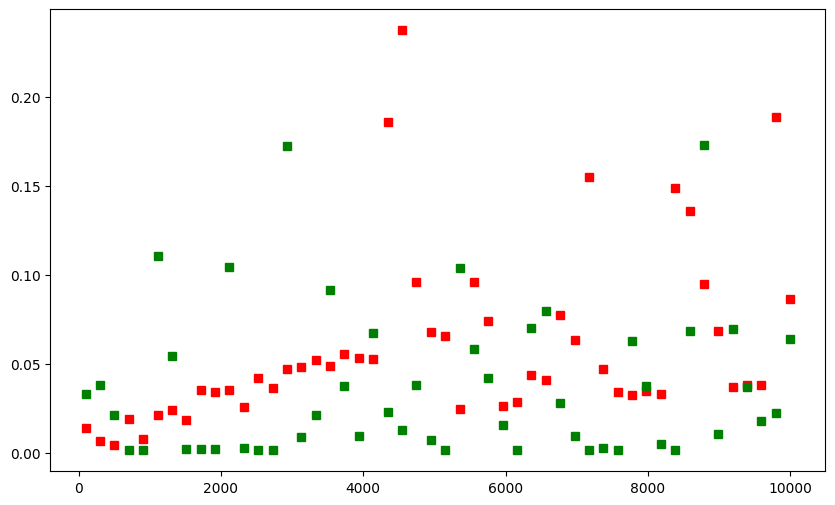

In [15]:
plt.plot(ns, ts_linsearch, 'sr') # Square Red
plt.plot(ns, ts_binsearch, 'sg') # Square Green

# Remove this if you don't have the recursive version
plt.plot(ns, ts_binsearch_recur, 'sy') # Square Yellow

plt.plot(ns, ts_dctadd, 'dm');   # Diamond Magenta
plt.plot(ns, ts_dctsearch, 'ob'); # Circle Blue
plt.legend(['Linear Search', 'Binary Search', 'Recursive Binary Search', 'Dict Add', 'Dict Search'])

 Dictionaries appear to be able to implement insertion and search in constant time even though it doesn't have an index to access elements.

 Python dictionaries are similar to hash tables and hashmaps.

# 4. Direct lookups via Hashing

Hashes (a.k.a. hash codes or hash values) are simply numerical values computed for objects.

In [16]:
hash('hello')

8196218557335782848

In [17]:
hash('skywalker')

-3836771156804575383

In [18]:
hash('skywalkers')

4197108925611885580

In [19]:
hash('skywalked')

949229147258361717

In [20]:
[hash(s) for s in ['different', 'objects', 'have', 'very', 'different', 'hashes']]

[8217144829040023489,
 2819728733771790465,
 7290066527574611226,
 2986561747746281400,
 8217144829040023489,
 -3834141385205430918]

How about modulo division (i.e. bucket)?

In [22]:
[hash(s)%100 for s in ['different', 'objects', 'have', 'very', 'different', 'hashes']]

[89, 65, 26, 0, 89, 82]

### Random Hashing

The `hash` function in Python is _randomized_ by default -- i.e., each time a Python interpreter is fired up, the implementation of `hash` will use a different "seed" for the random number generator used in computing hashes.

- While hashcodes computed for a given value will be consistent for a given interpreter instance, they will not be across instances!
- This means we shouldn't save hashcodes for values to disk, or save them to a database, as values will almost certainly hash to different hashcodes after we restart our software!

## 5. Hashtables

A hashtable is an implementation of the "map" abstract data type (aka "dictionary"), which associate keys (must be unique) with values. \

A hashtable uses the hashcode for a key to compute an index into an array where the corresponding key/value pair will be stored.

In [23]:
class HashTable:
    def __init__(self, n_buckets):
        self.buckets = [None] * n_buckets

    def __setitem__(self, key, val):
        bidx = hash(key) % len(self.buckets)
        self.buckets[bidx] = [key, val]

    def __getitem__(self, key):
        bidx = hash(key) % len(self.buckets)
        if self.buckets[bidx] is not None:
            return self.buckets[bidx][1]
        else:
            raise KeyError(key)

    def __contains__(self, key):
        try:
            _ = self[key]
            return True
        except:
            return False

In [24]:
ht = HashTable(75)
ht[175] = 'Tony Stark'
ht[100] = 'Steve Rogers'
ht[275] = 'Peter Parker'

In [25]:
ht[175]

'Steve Rogers'

In [26]:
ht[100]

'Steve Rogers'

Collision?

In [27]:
ht[275]

'Peter Parker'

In [28]:
print(hash(175)%75)
print(hash(100)%75)
print(hash(275)%75)

25
25
50


## Lab 6-3: Dealing with Collisions


### Problem Descriptions

1. Implement `_hash` method in a HashTable class to calculate the hash
  - Use dividion modulo: $ hash(k) $ mod $n$, where $n$ is the number of buckets
2. Implement `insertData` method in a HashTable class to insert a key/value pair
  - Calculate the hashkey to find out which bucket to insert the key/value pair
  - Rehash the key if the collision occurs using **Linear Probing**

3. Implement `searchData` method in a HashTable class to search for a given key
  - Calculate the hashkey to find out which bucket to search insert the key/value pair
  - Rehash the key if the collision occurs using **Linear Probing** and continues the search

### Requirements

Insertion Cases:
- Empty Slot: If an empty slot (None) is found, the key-value pair is inserted, and the function returns `(hash key, number of collisions)`.
- Key Exists: If a slot with the same key is found, rehash the key using **Linear Probing**
- Table Full/No Insertion: If the loop completes without finding an empty slot or the key, it means the table is full (or a very unlikely infinite loop due to a poor hash function, not handled here). It raises a `KeyErrorException` with a message "HashTable is full or key cannot be inserted"

Search Cases:
- Key Found: If the key is found, the corresponding value is returned.
- Key Not Found: If an empty slot is encountered or the loop completes without finding the key, it means the key is not present, and "Not Found" is returned.



In [86]:
class HashTable:
    def __init__(self, n_buckets):
        self.buckets = [None] * n_buckets

    def __setitem__(self, key, val):
        bidx = hash(key) % len(self.buckets)
        self.buckets[bidx] = [key, val]

    def __getitem__(self, key):
        bidx = hash(key) % len(self.buckets)
        if self.buckets[bidx] is not None:
            return self.buckets[bidx][1]
        else:
            raise KeyError(key)

    def __contains__(self, key):
        try:
            _ = self[key]
            return True
        except:
            return False

    def __len__(self):
        # Count how many slots are occupied in the table
        return sum(1 for bucket in self.buckets if bucket is not None)

    def insertData(self, key, val):
        no_collision = 0
        bidx = hash(key) % len(self.buckets)

        while self.buckets[bidx] is not None:  # Collision occurs
            no_collision += 1
            bidx = (bidx + 1) % len(self.buckets)  # Linear probing to next available slot

        self.buckets[bidx] = [key, val]  # Insert the new key-value pair
        return (bidx, no_collision)

    def searchData(self, key):
        no_collision = 0
        bidx = hash(key) % len(self.buckets)

        while self.buckets[bidx] is not None:
            if self.buckets[bidx][0] == key:  # Found the key
                return self.buckets[bidx][1]
            no_collision += 1
            bidx = (bidx + 1) % len(self.buckets)  # Linear probing

        return "Not Found"  # Key not found after probing


### Testing Codes

In [80]:
ht = Hashtable(75)
ht.insertData(175, 'Tony Stark')
ht.insertData(100, 'Steve Rogers')
ht.insertData(275, 'Peter Parker')

(50, 0)

In [81]:
ht.searchData(175)

'Tony Stark'

In [82]:
ht.searchData(100)

'Steve Rogers'

In [83]:
ht.searchData(275)

'Peter Parker'

In [84]:
ht.searchData(300)

'Not Found'

### Structured Test Case

Run the following code and see the result:
- If all tests pass, you'll see 'All test cases passed' (which is good!).
- If a test fails, you'll see an AssertionError indicating which test case failed and why.

In [ ]:
def test_hash_table():
    # Test Case 1: Basic Insertion and Search
    ht1 = HashTable(10)
    assert ht1.insertData("apple", 1) == (hash('apple')%10, 0), "Test Case 1: Insert 'apple' failed or the number of collisions is incorrect"
    assert ht1.insertData("banana", 2) == (hash('banana')%10, 0), "Test Case 1: Insert 'banana' failed or the number of collisions is incorrect"
    assert ht1.insertData("cherry", 3) == (hash('cherry')%10, 0), "Test Case 1: Insert 'cherry' failed or the number of collisions is incorrect"

    assert ht1.searchData("apple") == 1, "Test Case 1: Search for 'apple' failed"
    assert ht1.searchData("banana") == 2, "Test Case 1: Search for 'banana' failed"
    assert ht1.searchData("cherry") == 3, "Test Case 1: Search for 'cherry' failed"
    assert ht1.searchData("grape") == "Not Found", "Test Case 1: Search for 'grape' failed"
    assert len(ht1) == 3

    # Test Case 2: Collision Handling
    ht2 = HashTable(5)
    assert ht2.insertData("f", 2) == (hash('f')%5, 0), "Test Case 2: Insert first 'f' failed or the number of collisions is incorrect"
    assert ht2.insertData("f", 3) == ((hash('f')+1)%5, 1), "Test Case 2: Insert second 'f' failed or the number of collisions is incorrect"  # collision

    assert ht2.searchData("f") == 2, "Test Case 2: Search for 'f' failed"
    assert len(ht2) == 2

    # Test Case 3: Table Full
    ht4 = HashTable(2)
    assert ht4.insertData("a", 1) == (hash('a')%2, 0), "Test Case 3: Insert first 'a' failed or the number of collisions is incorrect"
    assert ht4.insertData("a", 2) == ((hash('b')+1)%2, 1), "Test Case 3: Insert second 'a' failed or the number of collisions is incorrect" # collision
    try:
        ht4.insertData("a", 3)
        assert False, "Test Case 3: Exception not raised when inserting into full table"
    except KeyError as e:
        assert e.args[0] == "HashTable is full or key cannot be inserted", "Test Case 3: Incorrect exception message"
    assert len(ht4) == 2

    # Test Case 4: Empty table
    ht5 = HashTable(5)
    assert ht5.searchData("a") == "Not Found", "Test case 4: Search in empty table failed"
    assert len(ht5) == 0

    print("\n#############################################")
    print("All test cases passed!")
    print("#############################################")

# Run the tests
if __name__ == "__main__":
    test_hash_table()

---